# **Libraries**

Import semua library yang dibutuhkan.

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud
import geopandas as gpd


In [33]:
import warnings
warnings.filterwarnings('ignore')

# **Data**

Import *dataset london_crime_by_lsoa.csv* ke dalam variabel **data**.

In [34]:
data = pd.read_csv("dataset/london_crime_by_lsoa.csv")
data.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

Buatlah salinan dari **data** dan beri nama **london_crime**, sehingga jika ada perubahan tidak akan mempengaruhi *dataset* asli.

In [35]:
london_crime = data.copy()

Periksa, apakah ada nilai null dalam *dataset*.

In [36]:
london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Menampilkan seluruh nama wilayah yang ada di London.

In [37]:
london_crime['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

Buat kolom baru dan beri nama **date** dengan menggabungkan kolom **year** dan **month**, lalu ubah menjadi *datetime*.

In [38]:
date = []
for i,j in zip(london_crime["month"],london_crime["year"]):
    date.append(f"{i} {j}")
    
london_crime["date"] = date
london_crime["date"] = pd.to_datetime(london_crime["date"])
london_crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month       date  
0  Burglary in Other Buildings      0  2016     11 2016-11-01  
1               Other violence      0  2016     11 2016-11-01  
2               Other violence      0  2015      5 2015-05-01  
3  Burglary in Other Buildings      0  2016      3 2016-03-01  
4            Personal Property      0  2008      6 2008-06-01

Hapus kolom yang tidak perlu dan tetapkan **date** sebagai *index*.

In [39]:
london_crime = london_crime.sort_values("date")
london_crime = london_crime.drop(["lsoa_code","year","month"],axis=1)
london_crime = london_crime.set_index("date")
london_crime.head()

borough               major_category  \
date                                                              
2008-01-01    Barking and Dagenham                     Burglary   
2008-01-01               Redbridge              Criminal Damage   
2008-01-01                  Barnet                        Drugs   
2008-01-01  Hammersmith and Fulham  Violence Against the Person   
2008-01-01    Barking and Dagenham              Sexual Offences   

                         minor_category  value  
date                                            
2008-01-01  Burglary in Other Buildings      3  
2008-01-01  Criminal Damage To Dwelling      0  
2008-01-01             Drug Trafficking      0  
2008-01-01               Common Assault      0  
2008-01-01                 Other Sexual      0

# **Line Plot - Tahun Berapa yang Memiliki Tingkat Kejahatan Terendah?**

Buat sebuah *dataframe* baru dan beri nama **sum_per_year** yang terdiri dari jumlah kejahatan per tahun.

In [40]:
sum_per_year = london_crime.groupby(london_crime.index.year)[["value"]].sum()
sum_per_year.head()

value
date        
2008  738641
2009  717214
2010  715324
2011  724915
2012  737329

Buat **Line Plot** untuk memvisualisasikan jumlah kejahatan berdasarkan tahun.

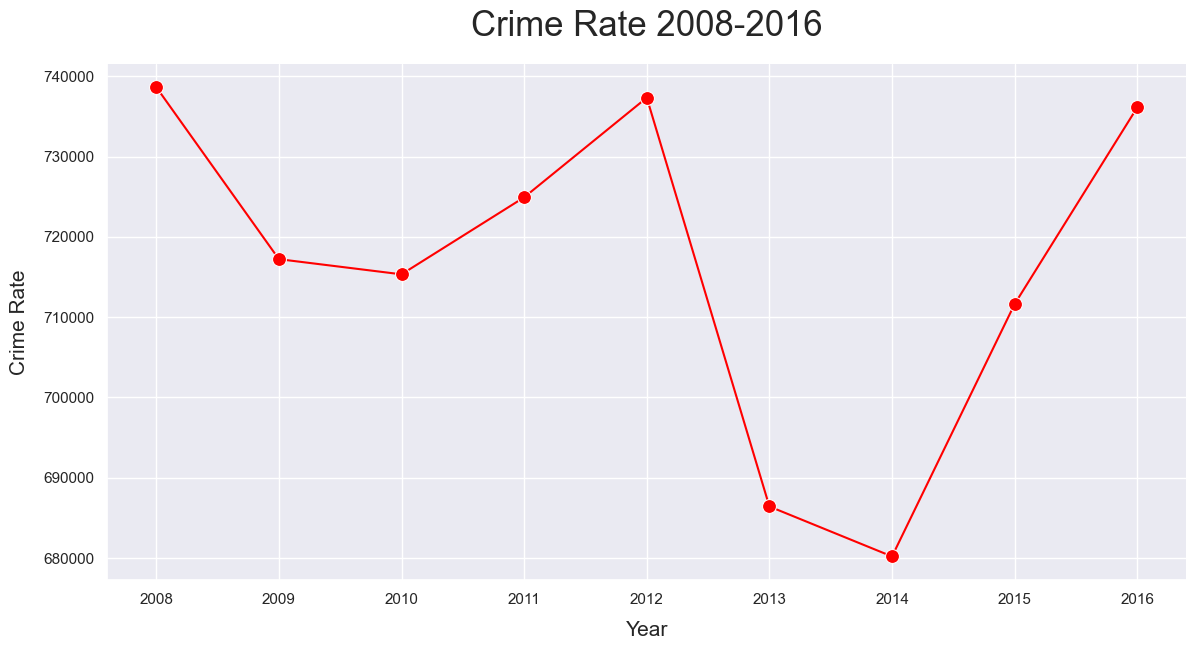

In [41]:
sns.relplot(x="date", y="value", 
            data=sum_per_year, kind="line", 
            ci=None, height=6, aspect=2,
            color='red', marker='o',markersize=10)
sns.set_style("darkgrid")
plt.title('Crime Rate 2008-2016',size=25,pad=20)
plt.xlabel('Year',size=15,labelpad=10)
plt.ylabel('Crime Rate',size=15,labelpad=10)
plt.show()

**Kesimpulan:** Berdasarkan grafik di atas, dapat disimpulkan bahwa pada tahun 2008, 2012, dan 2016 merupakan tahun dengan tingkat kejahatan yang sangat tinggi. Lalu terdapat penurunan yang sangat drastis pada tahun 2013 dan terdapat kenaikan yang sangat drastis pada tahun 2015 diikuti tahun 2016. Terlihat juga pada grafik di atas bahwa tahun 2014 merupakan tahun paling aman, karena memiliki tingkat kejahatan yang paling rendah diantara yang lain.

# **Area Plot - Bagaimana Tren Kejahatan yang Terjadi di 5 Wilayah dengan Tingkat Kejahatan Tertinggi dari Tahun 2008-2016?**

5 wilayah dengan tingkat kejahatan tertinggi, yaitu:
- Westminter
- Lambeth
- Southwark
- Camden
- Newham

Buat sebuah *variabel* yang hanya berisi 5 wilayah dengan tingkat kejahatan tertinggi, lalu jumlahkan tingkat kejahatan di setiap wilayah dan tahun.

In [42]:
top5_borough = london_crime.groupby('borough')[['value']].sum().sort_values('value',ascending=False).head().index
top5_borough

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], dtype='object', name='borough')

Buat sebuah *dataframe* baru dan beri nama **top_5** yang terdiri dari jumlah kejahatan per tahun.

In [43]:
top5 = london_crime[london_crime['borough'].isin(top5_borough)][['borough','value']]
top5 = top5.groupby(['borough',top5.index.year])[['value']].sum().reset_index()
top5.head()

borough  date  value
0  Camden  2008  32010
1  Camden  2009  31612
2  Camden  2010  31804
3  Camden  2011  33956
4  Camden  2012  31472

Buat *dataframe* yang berisi **date** sebagai *index* dan 5 wilayah tertinggi sebagai *column* serta **value** sebagai *values* dari *dataframe* tersebut. Hal ini dilakukan untuk mempermudah dalam pembuatan **Area Plot**.

In [44]:
top5_area=top5.pivot_table(values='value', index='date', columns='borough')
top5_area

borough  Camden  Lambeth  Newham  Southwark  Westminster
date                                                    
2008      32010    31717   29752      33470        47846
2009      31612    31225   28610      30623        48456
2010      31804    31671   30728      31320        48116
2011      33956    33224   27978      30723        54243
2012      31472    33473   30067      30737        59226
2013      28435    31868   27577      31128        53852
2014      27198    31765   28005      28912        47564
2015      29477    33164   29217      30260        47395
2016      29183    34071   30090      31636        48330

Buat **Area Plot** untuk memvisualisasikan tren kejahatan di Camden, Lambeth, Newham, Southwark, dan Westminster dari tahun 2008-2016.

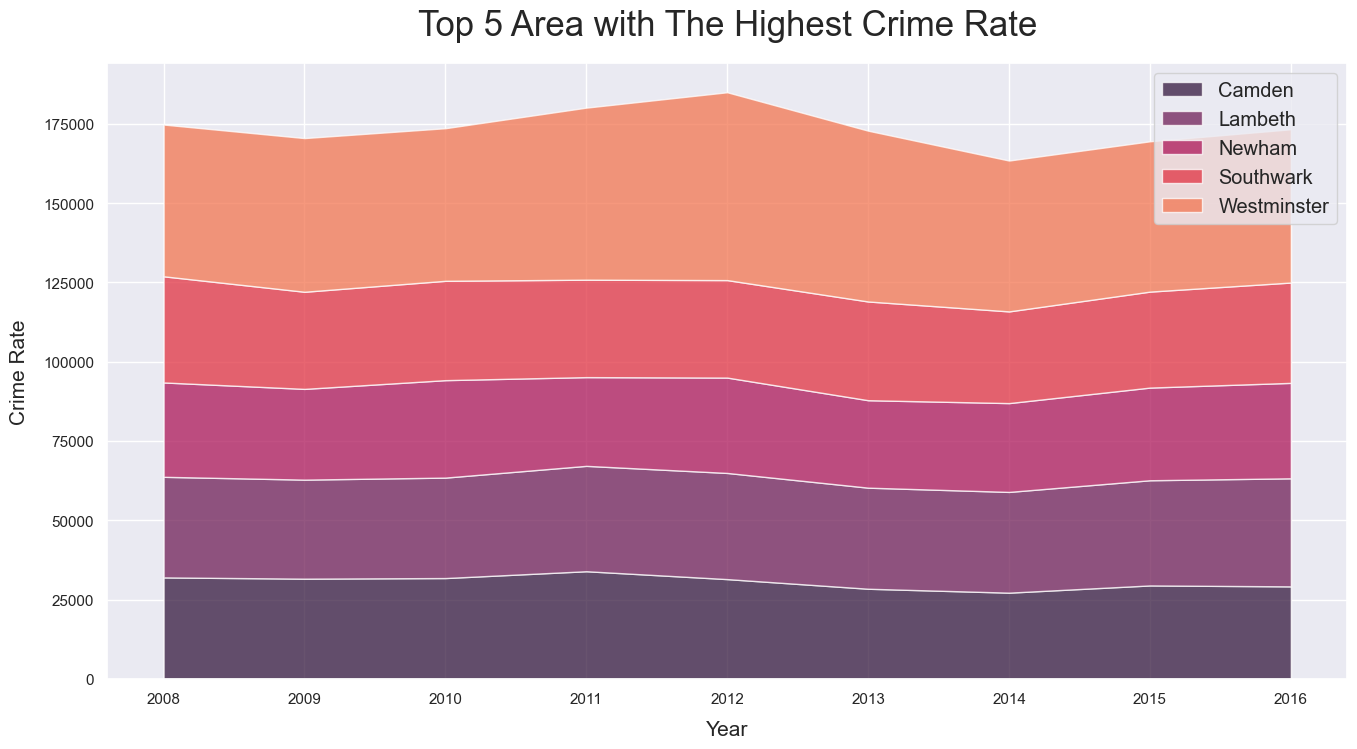

In [45]:
sns.set_theme()
sns.set_palette("rocket")
plt.figure(figsize=(16, 8))
plt.stackplot(top5_area.index,top5_area.Camden,top5_area.Lambeth,
              top5_area.Newham,top5_area.Southwark,top5_area.Westminster,
              alpha=0.75,labels=['Camden','Lambeth','Newham','Southwark','Westminster'])
plt.title('Top 5 Area with The Highest Crime Rate',size=25,pad=20)
plt.xlabel('Year',size=15,labelpad=10)
plt.ylabel('Crime Rate',size=15,labelpad=10)
plt.legend(fontsize='large')
plt.show()

**Kesimpulan:** Berdasarkan grafik di atas, dapat disimpulkan bahwa semua wilayah memiliki tren fluktuasi yang sama. Kejahatan tertinggi terjadi pada tahun 2012. Terlihat juga bahwa Westminster memiliki area paling luas sehingga dapat dikatakan bahwa Westminster merupakan wilayah dengan tingkat kejahatan tertinggi.

# **Scatter Plot - Bagaimana Pola Data dari Jumlah Kejahatan Berdasarkan Bulan?**

Buat sebuah *dataframe* baru bernama **value_per_month** yang berisi jumlah kejahatan per bulan.

In [46]:
value_per_month = london_crime.groupby('date')[["value"]].sum().reset_index()

Buat **Scatter Plot** untuk memvisualisasikan pola data dari jumlah kejahatan berdasarkan bulan.

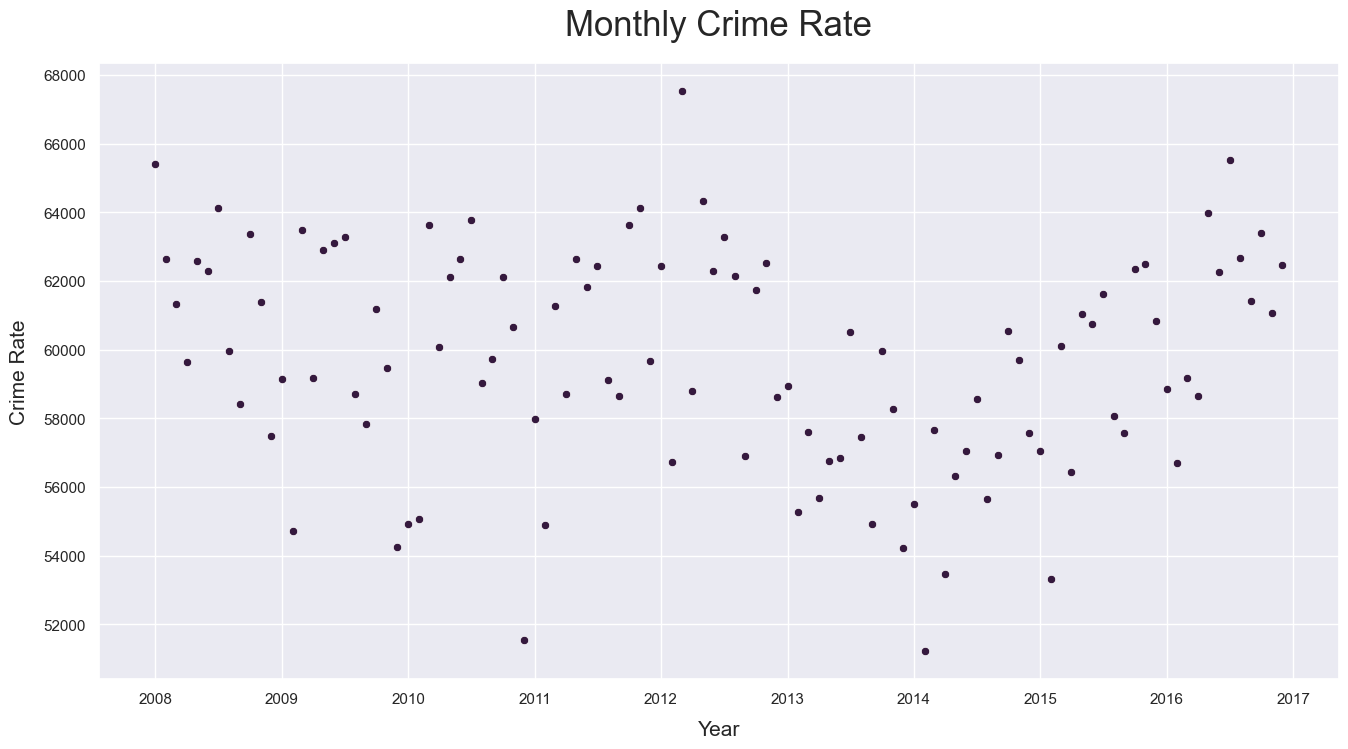

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(value_per_month, x="date", y="value")
plt.title('Monthly Crime Rate',size=25,pad=20)
plt.xlabel('Year',size=15,labelpad=10)
plt.ylabel('Crime Rate',size=15,labelpad=10)
plt.show()

**Kesimpulan:** Berdasarkan grafik di atas, dapat disimpulkan bahwa sebaran data acak atau tidak membentuk pola tertentu.

# **Box Plot - Apakah Terdapat Outlier Pada Tingkat Kejahatan di Wilayah Westminster?**

Buat sebuah *dataframe* baru bernama **westminster_box** yang berisi **value** untuk wilayah Westmister saja.

In [48]:
westminster_box = london_crime[london_crime['borough']=='Westminster'][['value']].resample('M').sum()

Buat **Box Plot** untuk mendeteksi ada atau tidaknya outlier.

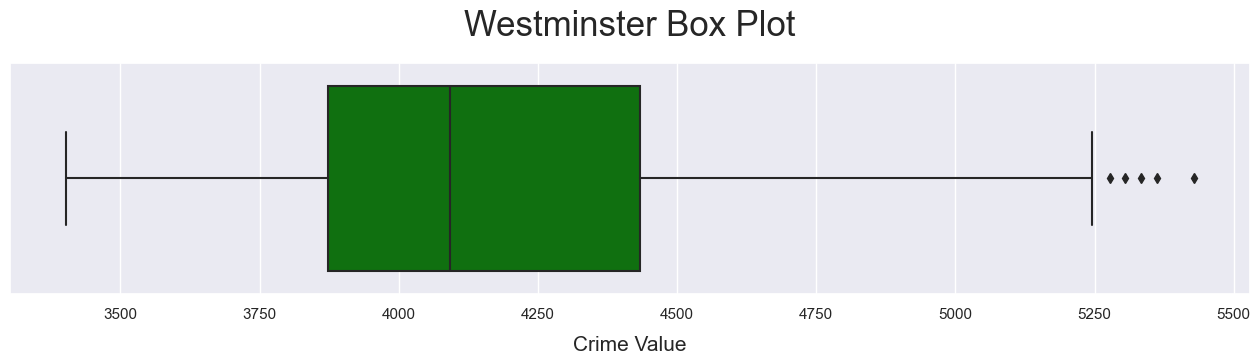

In [49]:
plt.figure(figsize=(16, 3))
sns.boxplot(westminster_box, x="value",color='green')
plt.title('Westminster Box Plot',size=25,pad=20)
plt.xlabel('Crime Value',size=15,labelpad=10)
plt.show()

**Kesimpulan:** Berdasarkan grafik di atas, dapat disimpulkan bahwa data cenderung miring ke kanan (*positive skewness*), hal itu ditunjukkan dengan letak garis median tidak berada di tengah kotak dan whisker kanan lebih panjang daripada whisker kiri serta terdapat outlier di bagian kanan berjumlah 5.

# **Histogram - Bagaimana Tingkat Kejahatan di Wilayah Westminster Terdistribusi di Sepanjang Rentang Nilai-nilainya?**

Buat sebuah *dataframe* baru bernama **westminster_box** yang berisi **value** untuk wilayah Westmister saja.

In [50]:
westminster_hist = london_crime[london_crime['borough']=='Westminster'][['value']].resample('M').sum()

Buat **Histogram** untuk mendeteksi distribusi yang terjadi.

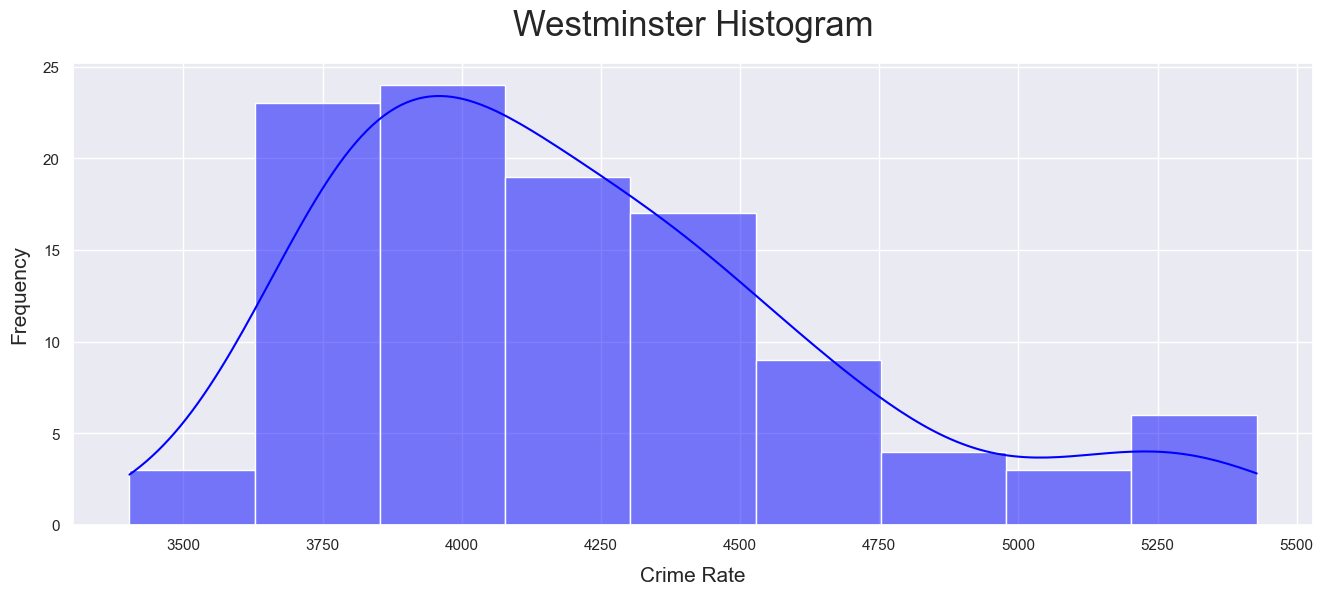

In [51]:
plt.figure(figsize=(16, 6))
sns.histplot(westminster_hist, x="value",color='blue',kde=True)
plt.title('Westminster Histogram',size=25,pad=20)
plt.xlabel('Crime Rate',size=15,labelpad=10)
plt.ylabel('Frequency',size=15,labelpad=10)
plt.show()

**Kesimpulan:** Berdasarkan grafik di atas, dapat disimpulkan bahwa distribusi cenderung miring ke kanan (*positive skewness*), karena ekor kanan lebih panjang daripada ekor kiri. Hal ini berarti sebagian nilai-nilai distibusi terjadi di sisi kiri.

# **Bar Chart - Kategori Kejahatan Apa yang Paling Sering Terjadi di 5 Wilayah dengan Tingkat Kejahatan Tertinggi?**

Buat sebuah *dataframe* baru dan beri nama **borough_major** yang terdiri dari jumlah kejahatan berdasarkan wilayah dan kategori utama.

In [52]:
borough_major = london_crime.groupby(["borough","major_category"])[["value"]].sum()
borough_major = borough_major.reset_index()
borough_major = borough_major.sort_values("value",ascending=False)
borough_major.head()

borough      major_category   value
293  Westminster  Theft and Handling  277617
52        Camden  Theft and Handling  140596
194      Lambeth  Theft and Handling  114899
248    Southwark  Theft and Handling  109432
167    Islington  Theft and Handling  107661

Buat *variabel* yang masing-masing berisi 5 wilayah dengan tingkat kejahatan tertinggi.

In [53]:
top5_westminster=borough_major[borough_major['borough']=='Westminster']
top5_camden=borough_major[borough_major['borough']=='Camden']
top5_lambeth=borough_major[borough_major['borough']=='Lambeth']
top5_southwark=borough_major[borough_major['borough']=='Southwark']
top5_newham=borough_major[borough_major['borough']=='Newham']

Buat 'dataframe' bernama **top5_all** yang berisi gabungan dari 5 wilaayah tadi. Hal ini dilakukan untuk mempermudah dalam pembuatan **Bar Chart**.

In [54]:
top5_all=pd.concat([top5_westminster, top5_camden],ignore_index=True)
top5_all=pd.concat([top5_all, top5_lambeth],ignore_index=True)
top5_all=pd.concat([top5_all, top5_southwark],ignore_index=True)
top5_all=pd.concat([top5_all, top5_newham],ignore_index=True)
top5_all

borough               major_category   value
0   Westminster           Theft and Handling  277617
1   Westminster  Violence Against the Person   71448
2   Westminster                        Drugs   34031
3   Westminster                     Burglary   29295
4   Westminster              Criminal Damage   20405
5   Westminster                      Robbery   15752
6   Westminster    Other Notifiable Offences    6148
7   Westminster             Fraud or Forgery     273
8   Westminster              Sexual Offences      59
9        Camden           Theft and Handling  140596
10       Camden  Violence Against the Person   53012
11       Camden                     Burglary   27939
12       Camden                        Drugs   21816
13       Camden              Criminal Damage   18482
14       Camden                      Robbery    9286
15       Camden    Other Notifiable Offences    3857
16       Camden             Fraud or Forgery     123
17       Camden              Sexual Offences      36
18      Lambeth           Theft and Handling  114899
19      Lambeth  Violence Against the Person   72726
20      Lambeth                     Burglary   30199
21      Lambeth              Criminal Damage   26136
22      Lambeth                        Drugs   25083
23      Lambeth                      Robbery   18408
24      Lambeth    Other Notifiable Offences    4520
25      Lambeth             Fraud or Forgery     137
26      Lambeth              Sexual Offences      70
27    Southwark           Theft and Handling  109432
28    Southwark  Violence Against the Person   68356
29    Southwark                     Burglary   27980
30    Southwark                        Drugs   27381
31    Southwark              Criminal Damage   24450
32    Southwark                      Robbery   16153
33    Southwark    Other Notifiable Offences    4696
34    Southwark             Fraud or Forgery     321
35    Southwark              Sexual Offences      40
36       Newham           Theft and Handling  106146
37       Newham  Violence Against the Person   66221
38       Newham                     Burglary   25356
39       Newham              Criminal Damage   24177
40       Newham                        Drugs   18389
41       Newham                      Robbery   16913
42       Newham    Other Notifiable Offences    4456
43       Newham             Fraud or Forgery     323
44       Newham              Sexual Offences      43

Buat **Bar Chart** untuk memvisualisasikan Jumlah Kejahatan berdasarkan wilayah dan juga kategori utama.

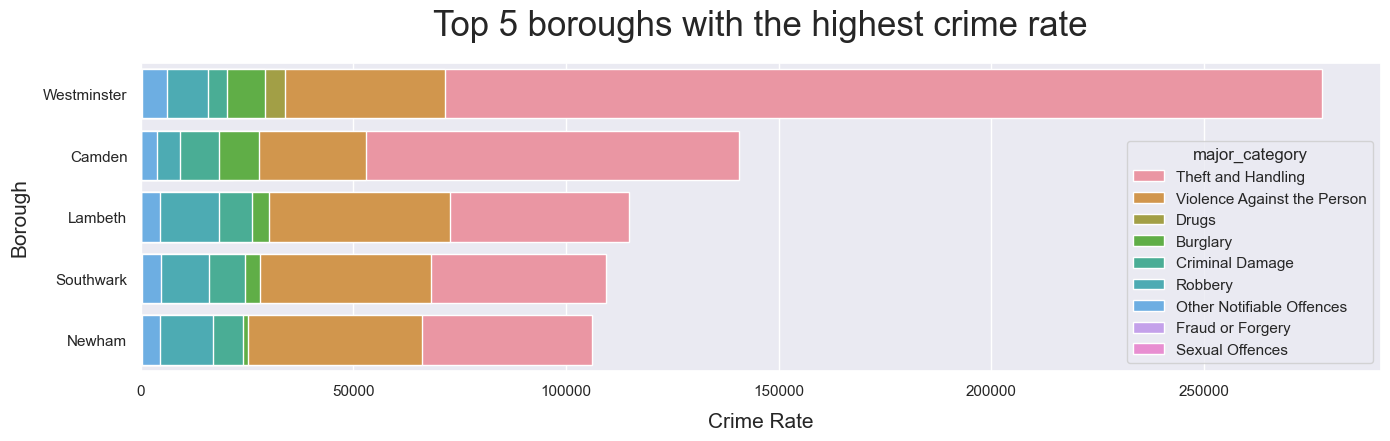

In [55]:
plt.figure(figsize=(16, 4))
sns.barplot(top5_all,x="value",y="borough",
            errorbar=None,hue='major_category',
            dodge=False)
plt.title('Top 5 boroughs with the highest crime rate',size=25,pad=20)
plt.xlabel('Crime Rate',size=15,labelpad=10)
plt.ylabel('Borough',size=15,labelpad=10)
plt.show()

**Kesimpulan:** Berdasarkan diagram batang di atas, dapat disimpulkan bahwa Westminster memiliki jumlah kejahatan paling banyak. Lalu kategori *Theft and Handling* merupakan kategori kejahatan yang paling sering terjadi, karena dapat dilihat bahwa kategori tersebut mendominasi diagram.

# **Pie Chart - Kejahatan Apa yang Memiliki Persentase Tertinggi pada Kategori Utama?**

Buat sebuah dataframe baru, dan beri nama **major** yang terdiri dari jumlah kejahatan berdasarkan kategori utama. Lalu kategori *Other Notifiable Offences, Fraud or Forgery, dan Sexual Offences* digabung menjadi satu dengan nama **Others**. Hal itu dilakukan, karena ketiga kategori tersebut memiliki nilai yang sangat kecil sehingga lebih baik digabung menjadi satu saja agar lebih mudah dilihat.

In [56]:
major = london_crime.groupby("major_category")[["value"]].sum()
major = major.sort_values("value",ascending=False)
major = major.reset_index()

combined_categories = major.iloc[6:].sum().value
baris_baru = pd.Series({"major_category" :'Others','value':combined_categories})
major = pd.concat([major, baris_baru.to_frame().T],ignore_index=True)
major = major.drop(range(6,9))
major = major.reset_index(drop=True)
major

major_category    value
0           Theft and Handling  2661861
1  Violence Against the Person  1558081
2                     Burglary   754293
3              Criminal Damage   630938
4                        Drugs   470765
5                      Robbery   258873
6                       Others   112947

Buat **Pie Chart** untuk memvisualisasikan persentase kejahatan berdasarkan **Kategori Utama**.

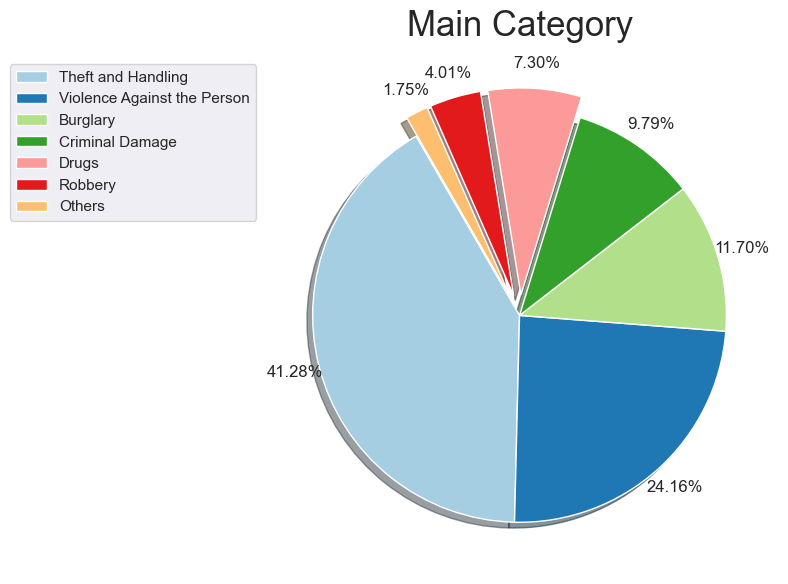

In [57]:
sns.set_theme()
sns.set_palette('Paired')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(major["value"],labels=None,
        autopct='%1.2f%%',pctdistance=1.12,
        shadow=True,explode=[0,0,0,0,0.1,0.1,0.1],startangle=120)
plt.legend(labels=major['major_category'],
           loc='upper left',bbox_to_anchor=(-0.5, 1))
plt.title('Main Category',size=25,pad=15)
plt.tight_layout()
plt.show()

**Kesimpulan:** Berdasarkan diagram lingkaran di atas, dapat dilihat bahwa kategori *Theft and Handling* memiliki persentase tertinggi sebesar 41,28% diikuti oleh kategori *Violence Against the Person* sebesar 24,16% untuk kategori utama.

# **Word Clouds - Kata Apa yang Paling Sering Muncul dalam Kategori Minoritas?**

Buat *variabel* bernama **teks** yang berisi semua kata yang ada pada kategori minoritas.

In [58]:
teks = " ".join(london_crime['minor_category'].unique())

Buat mask berbentuk lingkaran.

In [59]:
x,y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 150 ** 2
mask = 255 * mask.astype(int)

Buat **Word Clouds** untuk menemukan kata yang paling sering muncul dalam kategori minoritas.

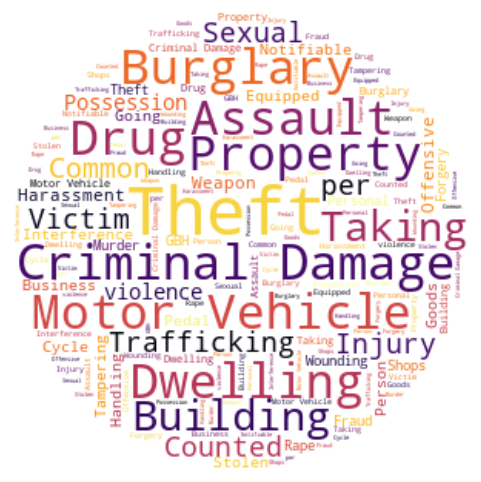

In [60]:
plt.figure(figsize=(6,6))
crimes_wordcloud = WordCloud(background_color="white", colormap='inferno',
                             collocations=True, repeat=True, mask=mask)
crimes_wordcloud.generate(teks)

plt.imshow(crimes_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**Kesimpulan:** Berdasarkan gambar di atas, dapat disimpulkan bahwa kategori minoritas didominasi oleh kata-kata seperti Theft, Dwelling, Drug, Assault, dan lain-lain.

# **Folium Maps dan Choropleth Maps - Bagaimana Kejahatan di London Secara Umum?**

## **Folium Maps**

Tambahkan dan cocokkan ID wilayah yang relevan di dalam *dataframe*.

In [61]:
borough_crimes = london_crime.groupby("borough")[["value"]].sum().reset_index()
#borough_crimes["id"] = borough_crimes["borough"].apply(lambda x: boroughs_id[x])
borough_crimes.head()

borough   value
0  Barking and Dagenham  149447
1                Barnet  212191
2                Bexley  114136
3                 Brent  227551
4               Bromley  184349

Kemudian, buat **Choropleth Map** untuk memvisualisasikan jumlah kejahatan di London dari tahun 2008-2016.

In [62]:
# Membaca file JSON yang berisi data wilayah
test = borough_crimes.rename(columns={'borough' : 'name'})

geojson_path = 'london_boroughs.json'
geojson_data = gpd.read_file(geojson_path)
gdf = geojson_data.merge(test, on='name')

# Membuat folium map
m = folium.Map(location=[51.3290110042255, -0.330679021892208], zoom_start=12)

# Menambah layer Chroropleth berdasarkan tingkat kejahatan
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=gdf,
    columns=['name', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name='Crime rate in boroughs of London',
    highlight=True,
    reset=True,  
    control=False, 
    show=False  
).add_to(m)

# Menambah layer GeoJson untuk styling dan tooltip
crime_detail = folium.GeoJson(
    gdf,
    style_function=lambda x: {
        'fillColor': 'YlGn',
        'color': '#000000',
        'fillOpacity': 0.1,
        'weight': 0.1
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','value'],
        aliases=['Borough Name:', 'Crime Rate:'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
).add_to(m)
m.add_child(crime_detail)
m.keep_in_front(crime_detail)
# Menampilkan peta
m
